In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import time
import matplotlib.pyplot as plt
import numpy as np

In [4]:
house_prices=pd.read_stata('Eko_data/house_prices.dta')

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <BarContainer object of 50 artists>)

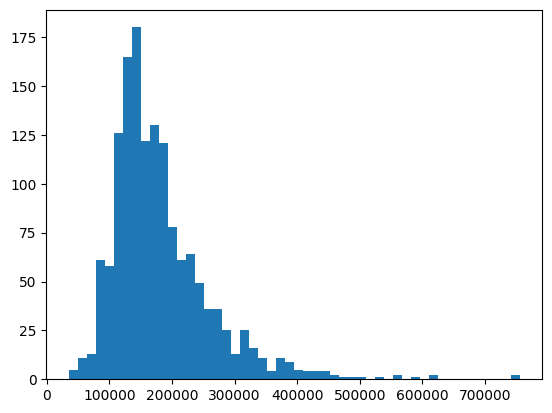

In [5]:
plt.hist(house_prices['SalePrice'],bins=50)

In [6]:
house_prices['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
house_prices.describe()

,SalePrice,Frontage_Property,Area_Property,PavedRoad,Overall_Quality,Overall_Condition,YearBuilt,YearRemodelling,Area_MasonryVeneer,Exterior_Quality,...,Flooring_Laminate,Flooring_Vinyl,Flooring_Stone,Color_Red,Color_White,Color_Yellow,Color_Blue,Color_Green,Color_Grey,Color_Brown
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,76.644196,10516.828082,0.995890,6.099315,5.575342,1971.267808,1984.865753,103.117123,3.39589,...,0.685616,0.791096,0.191096,0.312329,0.271233,0.118493,0.093836,0.059589,0.063014,0.037671
std,79442.502883,31.274670,9981.264932,0.063996,1.382997,1.112799,30.202904,20.645407,180.731373,0.57428,...,0.464429,0.406665,0.393299,0.463602,0.444748,0.323302,0.291700,0.236805,0.243071,0.190465
min,34900.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129975.000000,60.000000,7553.500000,1.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,163000.000000,73.000000,9478.500000,1.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,214000.000000,90.000000,11601.500000,1.000000,7.000000,6.000000,2000.000000,2004.000000,164.250000,4.00000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,755000.000000,405.783193,215245.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating training and testing samples. 
- Train_test_split has an argument suffle which is true by default. We can set a seed to make splitting reproducible. 

In [8]:
train, test=train_test_split(house_prices, test_size=0.3, random_state=123)

In [9]:
train

,SalePrice,Frontage_Property,Area_Property,PavedRoad,Overall_Quality,Overall_Condition,YearBuilt,YearRemodelling,Area_MasonryVeneer,Exterior_Quality,...,Flooring_Laminate,Flooring_Vinyl,Flooring_Stone,Color_Red,Color_White,Color_Yellow,Color_Blue,Color_Green,Color_Grey,Color_Brown
376,148000,57.000000,8846,1.0,5,5,1996,1996,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
250,76500,55.000000,5350,1.0,3,2,1940,1966,0.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
228,125000,70.000000,8521,1.0,5,5,1967,1967,0.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40,160000,84.000000,8658,1.0,6,5,1965,1965,101.0,3.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
428,195400,64.000000,6762,1.0,7,5,2007,2007,108.0,4.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,173000,95.551033,9130,1.0,6,8,1966,2000,252.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1122,112000,94.477511,8926,1.0,4,3,1956,1956,0.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1346,262500,144.156165,20781,1.0,7,7,1968,2003,0.0,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1406,133000,70.000000,8445,1.0,5,7,1972,2007,0.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
test

,SalePrice,Frontage_Property,Area_Property,PavedRoad,Overall_Quality,Overall_Condition,YearBuilt,YearRemodelling,Area_MasonryVeneer,Exterior_Quality,...,Flooring_Laminate,Flooring_Vinyl,Flooring_Stone,Color_Red,Color_White,Color_Yellow,Color_Blue,Color_Green,Color_Grey,Color_Brown
147,222500,97.493590,9505,1.0,7,5,2001,2001,180.0,4.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
676,87000,60.000000,9600,1.0,4,2,1900,1950,0.0,3.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1304,130000,32.000000,3363,1.0,7,5,2004,2004,117.0,4.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1372,274300,75.000000,9750,1.0,7,6,1998,1998,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1427,140000,60.000000,10930,1.0,5,6,1945,1950,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,131000,94.260278,8885,1.0,5,5,1983,1983,0.0,3.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1096,127000,60.000000,6882,1.0,6,7,1914,2006,0.0,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
637,93000,50.000000,6000,1.0,5,4,1954,1954,0.0,3.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
753,275500,80.000000,10240,1.0,8,5,2005,2005,178.0,4.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Selecting SalePrice variable as the variable we are trying to predict. 

In [11]:
train_targets=train.pop('SalePrice')
test_targets=test.pop('SalePrice')

In [12]:
test_targets=test_targets.to_numpy()

In [13]:
model = LinearRegression().fit(train,train_targets)


In [14]:
predictions_ols=model.predict(test)

In [15]:
MSE_OLS=mean_squared_error(test_targets, predictions_ols)
MSE_OLS

913015975.0106269

In [16]:
start_time = time.time()
model_lasso = make_pipeline(StandardScaler(), LassoCV(cv=30)).fit(train, train_targets)
fit_time = time.time() - start_time

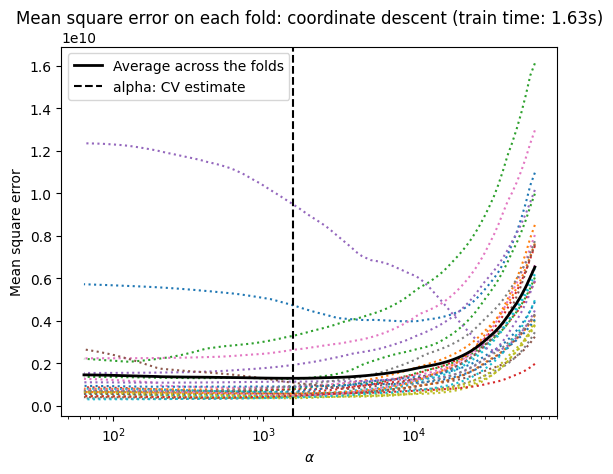

In [17]:
lasso = model_lasso[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

In [18]:
predictions_lasso=model_lasso.predict(test)

In [19]:
MSE_Lasso=mean_squared_error(test_targets, predictions_lasso)
MSE_Lasso

826596583.3888644

In [20]:
MSE_Lasso-MSE_OLS

-86419391.62176251

In [21]:
forest = RandomForestRegressor(random_state=123)
forest.fit(train,train_targets)

RandomForestRegressor(random_state=123)

In [22]:
predictions_randForest=forest.predict(test)

In [23]:
MSE_randForest=mean_squared_error(test_targets, predictions_randForest)
MSE_randForest

692446207.4078112

In [24]:
pd.DataFrame(columns=['OLS','Lasso','Random forest'],data=np.array([[MSE_OLS,MSE_Lasso,MSE_randForest]]))

,OLS,Lasso,Random forest
0,9.130160e+08,8.265966e+08,6.924462e+08


In [25]:
insurance=pd.read_stata('Eko_data/CaravanInsurance.dta')

### There is imbalance in data which will have affect hot the random forest model should be craeted.  
- Model that predicts always the outcome that insurance was not purchased would have high accuracy.
- We have to select other metrics (Precision and recall)

In [26]:
insurance

,Purchase,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,No,1.0,3.0,2.0,0.0,5.0,1.0,3.0,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,No,1.0,2.0,2.0,1.0,4.0,1.0,4.0,6.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,No,1.0,2.0,2.0,0.0,4.0,2.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,No,1.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,No,1.0,4.0,2.0,1.0,4.0,1.0,4.0,7.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,No,1.0,1.0,2.0,0.0,6.0,1.0,2.0,1.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5818,No,1.0,4.0,4.0,1.0,4.0,1.0,4.0,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5819,Yes,1.0,3.0,4.0,0.0,6.0,0.0,3.0,5.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5820,No,1.0,3.0,2.0,0.0,7.0,0.0,2.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
insurance.Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [28]:
outcomes={'No':0,'Yes':1}
insurance['Purchase']=insurance['Purchase'].map(outcomes)

In [29]:
train, test=train_test_split(insurance, test_size=0.3, random_state=123)

In [30]:
train_targets=train.pop('Purchase')
test_targets=test.pop('Purchase')

### If imbalance is not considered model won't find any purchases. 
- So we'll apply more weight to purchases.  

In [31]:
class_weights={0:1,1:15}

### Limiting depth of individual trees in forest is necessary to avoid overfitting. 

In [32]:
forest=RandomForestClassifier(random_state=123,class_weight=class_weights,max_depth=6)
forest=forest.fit(train,train_targets)

In [33]:
feature_names=train.columns

feature_importance_forest=pd.DataFrame(forest.feature_importances_,index=feature_names)
feature_importance_forest[0].nlargest(10)

PPERSAUT    0.141854
APERSAUT    0.105988
PBRAND      0.045844
MKOOPKLA    0.033664
MINKM30     0.033663
MOPLLAAG    0.027724
MAUT1       0.026697
MHKOOP      0.025652
MRELGE      0.024113
MAUT0       0.022589
Name: 0, dtype: float64

In [34]:
feature_importance_forest[0].nsmallest(10)

PBESAUT     0.000000
PVRAAUT     0.000000
PWERKT      0.000000
PPERSONG    0.000000
ABESAUT     0.000000
AVRAAUT     0.000000
AWERKT      0.000000
APERSONG    0.000000
AMOTSCO     0.000386
AWABEDR     0.000440
Name: 0, dtype: float64

In [35]:
predictions=forest.predict(test)

np.bincount(predictions)

print(classification_report(y_true=test_targets,y_pred=predictions,target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.96      0.85      0.91      1643
         Yes       0.18      0.50      0.26       104

    accuracy                           0.83      1747
   macro avg       0.57      0.68      0.58      1747
weighted avg       0.92      0.83      0.87      1747



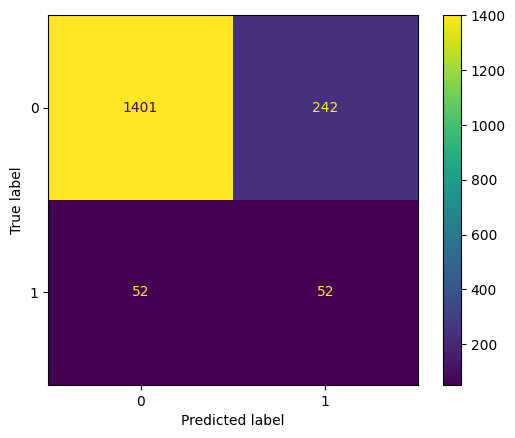

In [36]:
cm=confusion_matrix(test_targets,predictions,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
disp.plot()



### As can be see model:
- Correctly predicted 52 purchases
- Didn't predict 52 purchases 
- Predicted 242 observation as purchases even though no purchase actually happened 